<a href="https://colab.research.google.com/github/SD-Electro/Initial-Commit/blob/main/b5_tha3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Take Home Assignment 3

3.0 Install any dependencies if needed


In [6]:
!pip install supervision
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 914.7/914.7 kB 29.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 109.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 85.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 58.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 69.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-

In [7]:
from ultralytics import YOLO
import cv2
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image
import time
import supervision as sv

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


3.1.1 Draw the segmentation mask of the largest car: Use ultralytics library only

In [8]:
!git clone https://github.com/ashanW004/ETM4272.git

fatal: destination path 'ETM4272' already exists and is not an empty directory.


In [9]:
img = cv2.imread("/content/ETM4272/demo5_images/cars1.jpg")


0: 416x640 14 cars, 80.4ms
Speed: 14.5ms preprocess, 80.4ms inference, 353.4ms postprocess per image at shape (1, 3, 416, 640)


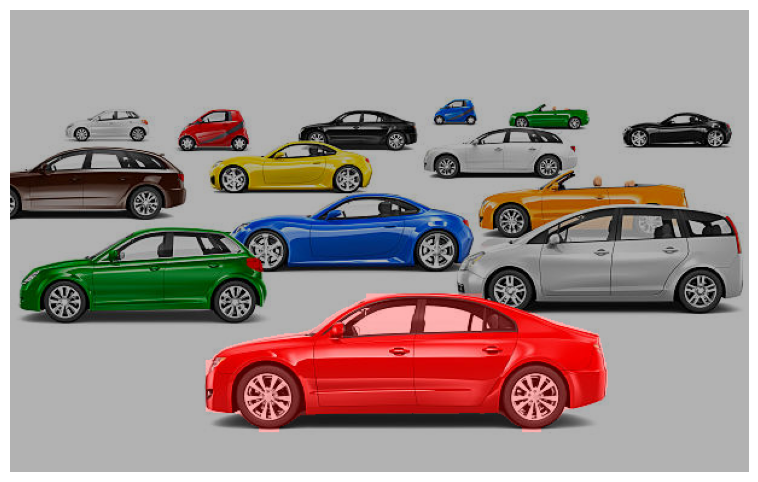

In [1]:
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Load YOLOv8 segmentation model
model = YOLO('yolov8x-seg.pt')  # Using the largest segmentation model

# Load the image
img = cv2.imread("/content/ETM4272/demo5_images/cars1.jpg")
image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Run segmentation on the image
results = model(image)

# Extract masks and bounding boxes
masks = results[0].masks.xy  # List of masks as polygon points
boxes = results[0].boxes.xyxy.cpu().numpy()  # Convert bounding boxes to NumPy

# Compute largest bounding box based on area
areas = [(box[2] - box[0]) * (box[3] - box[1]) for box in boxes]
largest_idx = np.argmax(areas) if areas else None

# Draw the mask for the largest car
if largest_idx is not None:
    mask_points = np.array(masks[largest_idx], dtype=np.int32)

    # Create a mask overlay
    mask_overlay = np.zeros_like(image)
    cv2.fillPoly(mask_overlay, [mask_points], (255, 0, 0))  # Red mask

    # Blend mask with the original image
    blended_image = cv2.addWeighted(image, 0.7, mask_overlay, 0.3, 0)

    # Display the result
    plt.figure(figsize=(10, 6))
    plt.imshow(blended_image)
    plt.axis("off")
    plt.show()


In [3]:
# Run a segmentation model on the image

# Iterate through the boxes in the results object
    # For each box , obtain the coordinates of the box, evaluate area
    # Find out the index of the box with the largest area

# Draw the mask of the box with the largest area.

3.1.2 Draw the segmentation mask of the largest car : Use ultralytics + supervision libraries

In [ ]:
# Run a segmentation model on the image using ultralytics libraries & a model of your choice

# Transfer ultralytics results to supervision

# Iterate through the masks & find the largest

# Display the largest mask


0: 416x640 14 cars, 76.2ms
Speed: 2.6ms preprocess, 76.2ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 640)


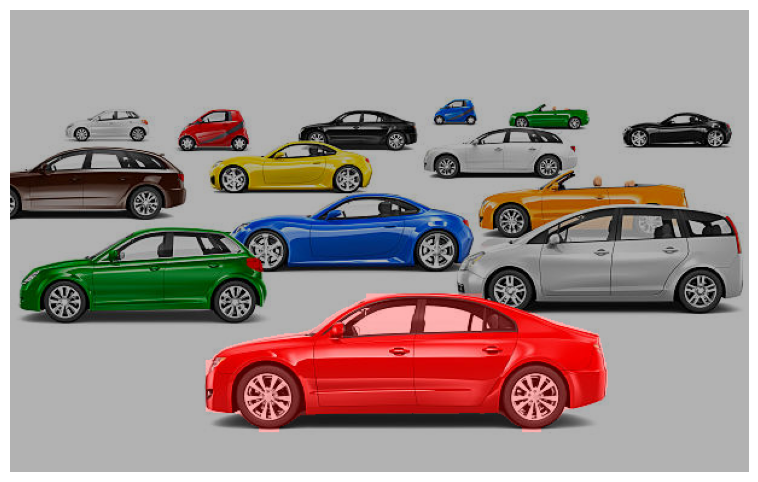

In [2]:
# Install required libraries
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Load YOLOv8 segmentation model
model = YOLO('yolov8x-seg.pt')  # Using the largest segmentation model

# Load the image
image_path = "/content/ETM4272/demo5_images/cars1.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Run segmentation on the image
results = model(image)

# Extract masks and bounding boxes
masks = results[0].masks.xy  # List of masks as polygon points
boxes = results[0].boxes.xyxy.cpu().numpy()  # Convert bounding boxes to NumPy

# Identify the largest mask based on area
largest_idx = max(range(len(masks)), key=lambda i: cv2.contourArea(np.array(masks[i], dtype=np.int32)), default=None)

# Create a blank mask image
mask_img = np.zeros_like(image)

# Draw the largest mask
if largest_idx is not None:
    mask_points = np.array(masks[largest_idx], dtype=np.int32)
    cv2.fillPoly(mask_img, [mask_points], (255, 0, 0))  # Apply red color to the mask

    # Overlay mask on the original image
    blended_image = cv2.addWeighted(image, 0.7, mask_img, 0.3, 0)

    # Display the image with the largest car's mask
    plt.figure(figsize=(10, 6))
    plt.imshow(blended_image)
    plt.axis("off")
    plt.show()


3.2 Estimate distance to centroid of chair

In [ ]:
# Detect the chair in the image  - A detection model of your choice can be used

# Calculate the centroid of the chair - Access box coordinates from the detection model and calculate the centroid

# Obtain the depth map - Depth Anything V2 can be used

# Query the value of the depth map at the centroid's location

100%|██████████| 131M/131M [00:00<00:00, 246MB/s]



0: 384x640 1 chair, 59.0ms
Speed: 2.2ms preprocess, 59.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)
Chair detected at: (241, 19), (464, 347)
Centroid: (352, 183)


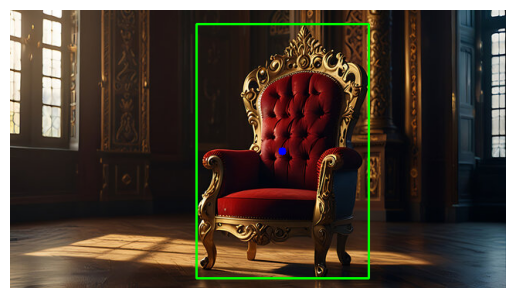

The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.


preprocessor_config.json:   0%|          | 0.00/437 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/954 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.48, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


model.safetensors:   0%|          | 0.00/99.2M [00:00<?, ?B/s]

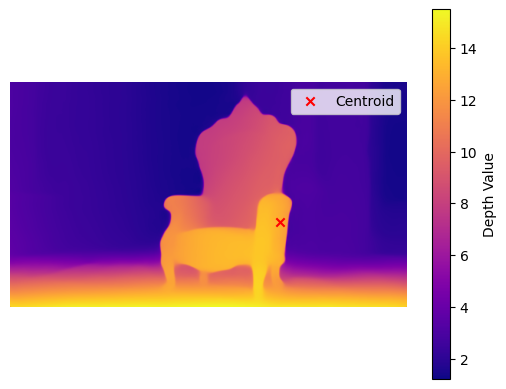

Depth at centroid (352, 183): 12.889397621154785
Estimated Distance to Chair: 12.89 meters


In [3]:
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO
import supervision as sv
from transformers import AutoProcessor, AutoModelForDepthEstimation
from PIL import Image

# Load YOLOv8 model for object detection
model = YOLO('yolov8x.pt')  # YOLOv8x for high accuracy

# Load the image
image_path = "/content/ETM4272/demo5_images/kingChair.jpg"  # Updated image path
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Perform object detection
results = model(image)

# Initialize centroid coordinates
centroid_x, centroid_y = None, None

# Extract bounding box of chair
for result in results:
    for box in result.boxes:
        cls = int(box.cls[0])  # Class ID
        if model.names[cls] == "chair":  # Check if detected object is a chair
            x1, y1, x2, y2 = map(int, box.xyxy[0])  # Get bounding box coordinates
            centroid_x = (x1 + x2) // 2
            centroid_y = (y1 + y2) // 2
            print(f"Chair detected at: ({x1}, {y1}), ({x2}, {y2})")
            print(f"Centroid: ({centroid_x}, {centroid_y})")

            # Draw bounding box and centroid
            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.circle(image, (centroid_x, centroid_y), 5, (0, 0, 255), -1)

# Show detected image
plt.imshow(image)
plt.axis("off")
plt.show()

# Check if centroid was found
if centroid_x is not None and centroid_y is not None:
    # Load Depth Anything V2 model
    processor = AutoProcessor.from_pretrained("LiheYoung/depth-anything-small-hf")
    depth_model = AutoModelForDepthEstimation.from_pretrained("LiheYoung/depth-anything-small-hf")

    # Convert image to PIL format
    image_pil = Image.open(image_path).convert("RGB")

    # Get depth map
    inputs = processor(image_pil, return_tensors="pt")
    with torch.no_grad():
        depth_output = depth_model(**inputs).predicted_depth

    # Convert depth map to NumPy array
    depth_map = depth_output.squeeze().cpu().numpy()

    # Show depth map with centroid
    plt.imshow(depth_map, cmap="plasma")
    plt.colorbar(label="Depth Value")
    plt.scatter(centroid_x, centroid_y, color="red", marker="x", label="Centroid")
    plt.legend()
    plt.axis("off")
    plt.show()

    # Query depth value at centroid
    depth_value = depth_map[centroid_y, centroid_x]
    print(f"Depth at centroid ({centroid_x}, {centroid_y}): {depth_value}")
    print(f"Estimated Distance to Chair: {depth_value:.2f} meters")
else:
    print("No chair detected!")


3.3.1  Draw bounding boxes around the "cars" using supervision.

In [5]:
!pip install gdown

In [9]:
# Downloads the video file from the google drive link, you'll have to "pip install gdown" first
import gdown

file_id = "1zcKvnDDEdyFF4B0B3eYud6DHU19nl0o4"
direct_url = f"https://drive.google.com/uc?id={file_id}"

gdown.download(direct_url, "vehicles_video.mp4", quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1zcKvnDDEdyFF4B0B3eYud6DHU19nl0o4
To: /content/vehicles_video.mp4
100%|██████████| 35.3M/35.3M [00:00<00:00, 98.0MB/s]


'vehicles_video.mp4'

In [11]:
import numpy as np
import supervision as sv
from ultralytics import YOLO

# Load YOLO model
model = YOLO("yolo11n.pt")  # Ensure the model file is present

# Define a BoxAnnotator instance (for drawing bounding boxes)
box_annotator = sv.BoxAnnotator()

def callback(frame: np.ndarray, _: int) -> np.ndarray:
    # Run YOLO on the frame
    results = model(frame)

    # Convert results to Supervision format
    detections = sv.Detections.from_ultralytics(results[0])

    # Annotate frame using the BoxAnnotator
    annotated_frame = box_annotator.annotate(scene=frame, detections=detections)

    return annotated_frame

# Process the video
sv.process_video(
    source_path="vehicles_video.mp4",
    target_path="result_tracking.mp4",
    callback=callback
)

print("Processing complete. Check 'result_tracking.mp4'")



0: 384x640 3 cars, 1 truck, 21.0ms
Speed: 3.8ms preprocess, 21.0ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 cars, 1 truck, 14.2ms
Speed: 3.7ms preprocess, 14.2ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 1 truck, 31.8ms
Speed: 3.9ms preprocess, 31.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 1 truck, 28.4ms
Speed: 3.9ms preprocess, 28.4ms inference, 8.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cars, 1 truck, 29.9ms
Speed: 3.8ms preprocess, 29.9ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cars, 1 truck, 13.7ms
Speed: 3.8ms preprocess, 13.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 1 truck, 13.6ms
Speed: 3.7ms preprocess, 13.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 1 truck, 30.8ms
Speed: 8.6ms preprocess, 30.8ms i

3.3.1 Track the cars. Add the tracker id to the bounding boxes around the cars. Use supervision

In [12]:
import numpy as np
import supervision as sv
from ultralytics import YOLO
import cv2

# Load YOLO model
model = YOLO("yolov8n.pt")  # Ensure this model exists

# Create a ByteTrack tracker
tracker = sv.ByteTrack()

# Define the annotators
box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator()

def process_frame(frame: np.ndarray) -> np.ndarray:
    # Run YOLO on the frame
    results = model(frame)

    # Convert YOLO results to Supervision detections
    detections = sv.Detections.from_ultralytics(results[0])

    # Update tracker with new detections
    detections = tracker.update_with_detections(detections)

    # Generate labels with tracker ID
    labels = [f"ID {int(tracker_id)}" for tracker_id in detections.tracker_id]

    # Annotate frame with bounding boxes and labels
    annotated_frame = box_annotator.annotate(scene=frame, detections=detections)
    annotated_frame = label_annotator.annotate(scene=annotated_frame, detections=detections, labels=labels)

    return annotated_frame

# Open video file
video_capture = cv2.VideoCapture("vehicles_video.mp4")
frame_width = int(video_capture.get(3))
frame_height = int(video_capture.get(4))
fps = int(video_capture.get(cv2.CAP_PROP_FPS))

# Define video writer
video_writer = cv2.VideoWriter("tracked_cars.mp4", cv2.VideoWriter_fourcc(*"mp4v"), fps, (frame_width, frame_height))

while video_capture.isOpened():
    ret, frame = video_capture.read()
    if not ret:
        break

    # Process frame
    annotated_frame = process_frame(frame)
    video_writer.write(annotated_frame)

# Release resources
video_capture.release()
video_writer.release()
cv2.destroyAllWindows()

print("✅ Processing complete! Check 'tracked_cars.mp4'")


100%|██████████| 6.25M/6.25M [00:00<00:00, 87.8MB/s]



0: 384x640 3 cars, 1 truck, 18.5ms
Speed: 2.7ms preprocess, 18.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 cars, 1 truck, 10.6ms
Speed: 3.6ms preprocess, 10.6ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 cars, 1 bus, 1 truck, 10.6ms
Speed: 3.7ms preprocess, 10.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 cars, 1 bus, 1 truck, 10.6ms
Speed: 3.7ms preprocess, 10.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 1 truck, 10.5ms
Speed: 3.6ms preprocess, 10.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cars, 1 bus, 1 truck, 10.8ms
Speed: 3.9ms preprocess, 10.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 1 truck, 9.9ms
Speed: 3.6ms preprocess, 9.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 cars, 1 truck, 10.5ms
Speed: 3.6ms p

3.3.2 Draw the track traces for the tracked cars. Use supervision

In [13]:
import numpy as np
import supervision as sv
from ultralytics import YOLO
import cv2  # OpenCV for drawing motion paths

# Load YOLO model for object detection
yolo_model = YOLO("yolov8n.pt")  # Ensure the model file exists

# Initialize a ByteTrack tracker
object_tracker = sv.ByteTrack()

# Create a BoxAnnotator instance for drawing bounding boxes
bounding_box_drawer = sv.BoxAnnotator()

# Dictionary to store movement history for each tracked object
movement_history = {}

def process_frame(frame: np.ndarray, _: int) -> np.ndarray:
    # Perform object detection using YOLO
    detection_results = yolo_model(frame)

    # Convert YOLO detection results into Supervision format
    detected_objects = sv.Detections.from_ultralytics(detection_results[0])

    # Update tracker with the detected objects
    tracked_objects = object_tracker.update_with_detections(detected_objects)

    # Generate display labels with unique tracker IDs
    object_labels = [f"ID {int(track_id)}" for track_id in tracked_objects.tracker_id]

    # Store the center points of bounding boxes for tracking paths
    for track_id, bbox in zip(tracked_objects.tracker_id, tracked_objects.xyxy):
        if track_id not in movement_history:
            movement_history[track_id] = []  # Initialize movement list for this object
        # Compute the center of the bounding box
        center_point = ((bbox[0] + bbox[2]) / 2, (bbox[1] + bbox[3]) / 2)
        movement_history[track_id].append(center_point)

    # Draw movement traces on the frame
    for track_id, path in movement_history.items():
        if len(path) > 1:
            for j in range(1, len(path)):
                cv2.line(frame, tuple(map(int, path[j - 1])), tuple(map(int, path[j])), (0, 255, 0), 2)

    # Apply bounding box annotations to the frame
    annotated_frame = bounding_box_drawer.annotate(scene=frame, detections=tracked_objects)

    # Add ID labels using Supervision's LabelAnnotator
    id_label_annotator = sv.LabelAnnotator()
    annotated_frame = id_label_annotator.annotate(scene=annotated_frame, detections=tracked_objects, labels=object_labels)

    return annotated_frame

# Process video and apply tracking
sv.process_video(
    source_path="vehicles_video.mp4",
    target_path="tracked_output.mp4",
    callback=process_frame
)

print("✅ Video processing completed! Check 'tracked_output.mp4'")



0: 384x640 3 cars, 1 truck, 9.8ms
Speed: 2.8ms preprocess, 9.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 cars, 1 truck, 11.0ms
Speed: 3.5ms preprocess, 11.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 cars, 1 bus, 1 truck, 9.6ms
Speed: 3.7ms preprocess, 9.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 cars, 1 bus, 1 truck, 10.9ms
Speed: 3.7ms preprocess, 10.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 1 truck, 10.4ms
Speed: 3.6ms preprocess, 10.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cars, 1 bus, 1 truck, 10.8ms
Speed: 3.7ms preprocess, 10.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 1 truck, 9.8ms
Speed: 3.7ms preprocess, 9.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 cars, 1 truck, 10.2ms
Speed: 4.2ms prepr

Questions:

Explain what "def callback(frame: np.ndarray, _: int) -> np.ndarray:" does.

Answers: Complete this section

The function definition def callback(frame: np.ndarray, _: int) -> np.ndarray: outlines a function named callback that accepts two parameters and returns a specific data type. Here’s a breakdown using different wording:

def callback:

This line declares a function named callback using the def keyword, which is how functions are created in Python.

frame: np.ndarray:

The first parameter, frame, is expected to be of type
np.ndarray (a NumPy array).
NumPy arrays (np.ndarray) are commonly used in image processing to store pixel data.
In this function, frame represents a single frame from the video being processed, stored as an array of numerical values corresponding to pixel intensities (such as grayscale values or RGB components).

_ : int:

The second argument is an integer, but it is labeled with an underscore (_) to signify that it won’t be utilized within the function.
The underscore is a convention in Python for variables that are required by function parameters but are not needed in the function’s logic.
This argument might represent the frame number or some other integer value passed during video processing, but since it’s not required for the function's operation, it is ignored.

-> np.ndarray:

This part indicates the function's return type.
The function is expected to return an instance of np.ndarray, meaning it outputs a processed image frame in NumPy array format.
Essentially, this function takes in an image (as an array), applies some modifications or analysis, and then returns the updated frame as an array.

The callback function takes two parameters:

The current video frame (frame), which represents an image in the form of a NumPy array.

An integer placeholder (_), which is not used within the function but is likely an index or timestamp passed by sv.process_video().

Function Behavior:

The function processes the given frame, performing operations such as object detection, tracking, and annotation.

After applying these modifications, it returns the updated frame in the form of a NumPy array, ensuring that the processed frame is ready for visualization or saving.

Usage in Video Processing:

Within the sv.process_video() function, callback is applied to each frame of the input video.

The first argument (frame) contains the pixel data for the current frame being processed.

The second argument (_) is provided but not utilized in the function; it is commonly an index number or timestamp.

The processed frame is returned with modifications (such as bounding boxes, labels, and tracking traces), allowing it to be saved in the output video or displayed in real time.